Marc Kaylor Final Project

Since one of my study areas in the geography department is hydrology i wanted to study something in this field. This project calls a csv file froma  google spreadsheet that contains peak discharge values from 1953 - 2015 for the Colorado River below Bakers Gulch and the East River at Almont. the Peak dischargers are listed in cubic feet per second or cfs for short. 

this data was called into the notebook and then i cleaned up the data before conducting any alaysis. with the data i wanted to see which location experiences the highest peak discharge over the entire study period and which location sees higher or lower peak discharge comparably. 

In [78]:
#setting up needed modules
from IPython.display import IFrame, Image, display, Latex, Math
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5, 4
import pysal as ps
import numpy as np

In [79]:
#calling in datatset from google spreadsheet
url = "https://docs.google.com/spreadsheets/d/1GZsLJuO1bwmY6OGxdejlNIJt7JazG7QqLITYjqnCRn0/pub?output=csv"
Qgauge = pd.read_csv(url)
Qgauge.head()
#Qgauge

,Location,Gauge,Date,Year,Peak Q(cfs)
0,CO river below Baker Gulch,9010500,6/13/1953,1953,630
1,CO river below Baker Gulch,9010500,5/19/1954,1954,165
2,CO river below Baker Gulch,9010500,6/15/1955,1955,255
3,CO river below Baker Gulch,9010500,5/22/1956,1956,527
4,CO river below Baker Gulch,9010500,6/30/1957,1957,976


In [ ]:
The data once called into the notebook was cleaned up to only have the location, Year, and Peak Q. To 
do this i used the drop functionality within pandas to delete Gauge and Date from the data. 

In [80]:
#delete columns that are not needed
QDrop = Qgauge.drop(['Gauge','Date'], axis=1)
QDrop.head()
#QDrop

,Location,Year,Peak Q(cfs)
0,CO river below Baker Gulch,1953,630
1,CO river below Baker Gulch,1954,165
2,CO river below Baker Gulch,1955,255
3,CO river below Baker Gulch,1956,527
4,CO river below Baker Gulch,1957,976


In [81]:
#tidy up the data set combining Year and Peak Q(cfs) to the same collumn with their corresponding values
#in the value column. 
tidy_Qgauge = pd.melt(QDrop, id_vars=["Location"],
                      var_name="Year,Peak Q(cfs),", value_name="value")
tidy_Qgauge.head()
#tidy_Qgauge

,Location,"Year,Peak Q(cfs),",value
0,CO river below Baker Gulch,Year,1953
1,CO river below Baker Gulch,Year,1954
2,CO river below Baker Gulch,Year,1955
3,CO river below Baker Gulch,Year,1956
4,CO river below Baker Gulch,Year,1957


In [82]:
pci = QDrop.ix[:, "Peak Q(cfs)":].T  # The 'T' means transpose...
pci.shape
pci

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
Peak Q(cfs),630,165,255,527,976,820,377,386,578,582,...,2070,1290,3060,2400,2570,2770,639,1400,2830,2790


In [83]:
pci.ix[0, :].values  # 'Values' means just get the raw array
#QArray

array([ 630,  165,  255,  527,  976,  820,  377,  386,  578,  582,  307,
        518,  880,  234,  721,  677,  685,  839,  840,  699,  688,  595,
        470,  347,  314,  792,  687,  699,  358,  422,  857,  780,  703,
        656,  364,  648,  298,  575,  437,  318,  578,  434,  819,  668,
        748,  428,  489,  690,  386,  233,  800,  180,  521,  494,  301,
        536,  494,  975, 1870,  186,  684, 1000,  928, 2900, 1170, 1540,
       2320, 4260, 2720, 1610, 1640, 1650, 2590, 1460, 2060, 2910, 1430,
       2200, 2650, 1990, 2500, 2030, 1790, 2410, 1750, 2290, 1400,  635,
       3130, 3300, 3130, 1300, 1860, 2650, 4030, 3200, 3060, 1820, 1430,
       1370, 1730, 1940, 1210, 2880, 2050, 4430, 3040, 3190, 1620, 1730,
       1800, 1430,  769, 2560, 1260, 2250, 2070, 1290, 3060, 2400, 2570,
       2770,  639, 1400, 2830, 2790], dtype=int64)

In [84]:
#defined classes into different quantile classes for each annual discharge value
q5 = np.array([ps.Quantiles(y).yb for y in pci.values]).T
q5.shape
q5[:, 0]

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0,
       0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 0, 1, 2, 2, 4, 2, 3, 3, 4, 4,
       3, 3, 3, 4, 3, 3, 4, 2, 3, 4, 3, 4, 3, 3, 4, 3, 3, 2, 1, 4, 4, 4, 2,
       3, 4, 4, 4, 4, 3, 2, 2, 3, 3, 2, 4, 3, 4, 4, 4, 3, 3, 3, 2, 2, 4, 2,
       3, 3, 2, 4, 3, 4, 4, 1, 2, 4, 4])

Add the Quantile values to the QDrop table 

In [143]:
# Add 1 because its easy to talk about it that way
QDrop["Quantile"] = q5.T.flatten() + 1
QDrop.head()
#QDrop

,Location,Year,Peak Q(cfs),Group,diff_from_ave,Quantile
0,CO river below Baker Gulch,1953,630,2,-759.198413,2
1,CO river below Baker Gulch,1954,165,1,-1224.198413,1
2,CO river below Baker Gulch,1955,255,1,-1134.198413,1
3,CO river below Baker Gulch,1956,527,2,-862.198413,2
4,CO river below Baker Gulch,1957,976,3,-413.198413,3


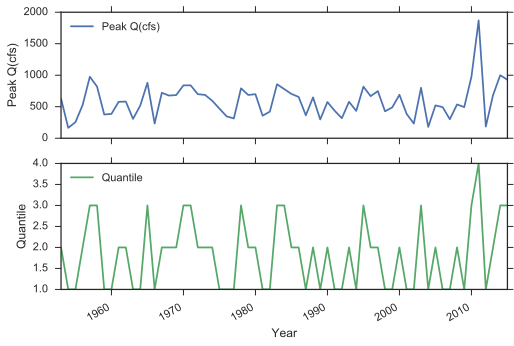

In [144]:
#seperate and only look at an inidividual site over time; colorado river below bakers gulch
CBG = QDrop[QDrop.Location == "CO river below Baker Gulch"].set_index("Year")
ax1, ax2 = CBG[["Peak Q(cfs)", "Quantile"]].plot(subplots=True)
ax1.set_ylabel("Peak Q(cfs)")
ax2.set_ylabel("Quantile")
plt.show()

The graphs above depict the Peak discharge in cfs and the Quantile rank versus time for the Colorado River below Bakers Gulch. the majority of discharges can be seen fluctuating between 300 and 1000 cfs; however, there is an outlier at close to 2000 cfs of peak discharge around 2010.

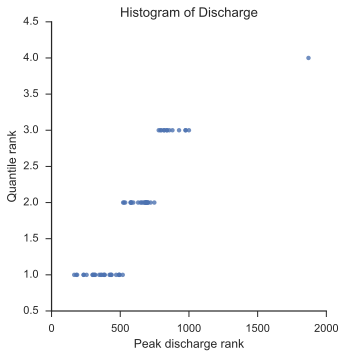

In [145]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Peak Q(cfs)', 'Quantile', 
           data=CBG, 
           fit_reg=False)
plt.title('Histogram of Discharge')
plt.xlabel('Peak discharge rank')
plt.ylabel('Quantile rank')

The majority of the discharges observed on the Colorado river below Bakers Gulch are found within the first, second, or third quantile. while a single outlier around 2010 can be found within the fourth quantile. 

In [89]:
#convert to marcov objects to summarize the transition dynamics for all units
m5 = ps.Markov(q5)
m5.transitions


array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [90]:
m5.p

matrix([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])

In [91]:
m5.steady_state

matrix([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

In [92]:
ps.ergodic.fmpt(m5.p).round(4)  # Round for nicer formatting

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

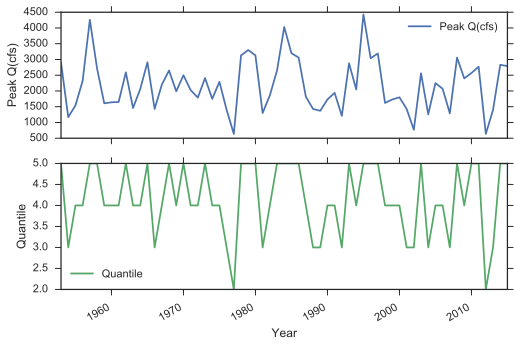

In [147]:
#looking at the East River at Almont
ERA = QDrop[QDrop.Location == "East River at Almont"].set_index("Year")
ax1, ax2 = ERA[["Peak Q(cfs)", "Quantile"]].plot(subplots=True)
ax1.set_ylabel("Peak Q(cfs)")
ax2.set_ylabel("Quantile")
plt.show()

The graphs above depict the Peak discharge in cfs and the Quantile rank versus time for the East River at Almont. the majority of discharges can be seen fluctuating between 1500 and 3000 cfs; however, there is a couple max outliers at close to 4500 cfs of peak discharge around 1955 and 1995. there are also a few min outliers close to 500 cfs 

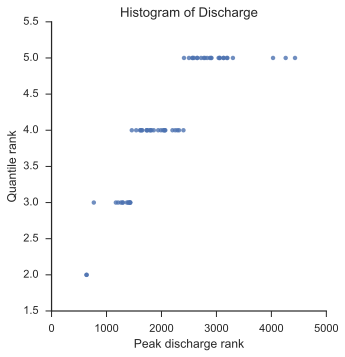

In [94]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Peak Q(cfs)', 'Group', 
           data=ERA, 
           fit_reg=False)
plt.title('Histogram of Discharge')
plt.xlabel('Peak discharge rank')
plt.ylabel('Quantile rank')

East River at Almont saw the highest discharges between the two sites by far. the majority of its discharges fell within the third, fourth, and fifth quantile rank, with a single outlier falling in the second qauntile rank. between the two sites i do not know much about their average precipitation or their annual climate to reasonably say why East River at Almont saw higher peak discharges. 

In [95]:
#convert to marcov objects to summarize the transition dynamics for all units
m5 = ps.Markov(q5)
m5.transitions

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [96]:
m5.steady_state

matrix([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

In [97]:
ps.ergodic.fmpt(m5.p).round(4)  # Round for nicer formatting

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [98]:
subset = QDrop.ix[:, "Peak Q(cfs)":]  # Grab all the 'year' columns
rpci = subset / subset.mean(axis=0)
rpci.head()  # Is this tidy data?
#rpci

,Peak Q(cfs),Group
0,0.453499,0.670213
1,0.118774,0.335106
2,0.183559,0.335106
3,0.379355,0.670213
4,0.702563,1.005319


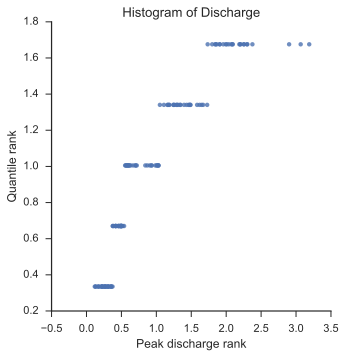

In [99]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Peak Q(cfs)', 'Group', 
           data=rpci, 
           fit_reg=False)
plt.title('Histogram of Discharge')
plt.xlabel('Peak discharge rank')
plt.ylabel('Quantile rank')

histogram showing the discharg distance from the average 

In [102]:
#finding average discharge
QArray = pci.ix[0, :].values
QArray


array([ 630,  165,  255,  527,  976,  820,  377,  386,  578,  582,  307,
        518,  880,  234,  721,  677,  685,  839,  840,  699,  688,  595,
        470,  347,  314,  792,  687,  699,  358,  422,  857,  780,  703,
        656,  364,  648,  298,  575,  437,  318,  578,  434,  819,  668,
        748,  428,  489,  690,  386,  233,  800,  180,  521,  494,  301,
        536,  494,  975, 1870,  186,  684, 1000,  928, 2900, 1170, 1540,
       2320, 4260, 2720, 1610, 1640, 1650, 2590, 1460, 2060, 2910, 1430,
       2200, 2650, 1990, 2500, 2030, 1790, 2410, 1750, 2290, 1400,  635,
       3130, 3300, 3130, 1300, 1860, 2650, 4030, 3200, 3060, 1820, 1430,
       1370, 1730, 1940, 1210, 2880, 2050, 4430, 3040, 3190, 1620, 1730,
       1800, 1430,  769, 2560, 1260, 2250, 2070, 1290, 3060, 2400, 2570,
       2770,  639, 1400, 2830, 2790], dtype=int64)

In [108]:
Qave = sum(QArray)/126
Qave 

1389.1984126984128

The average peak disharge combining the two study sites is about 1389.2 cfs

In [115]:
Qdiff= QArray-Qave
Qdiff

array([ -759.1984127, -1224.1984127, -1134.1984127,  -862.1984127,
        -413.1984127,  -569.1984127, -1012.1984127, -1003.1984127,
        -811.1984127,  -807.1984127, -1082.1984127,  -871.1984127,
        -509.1984127, -1155.1984127,  -668.1984127,  -712.1984127,
        -704.1984127,  -550.1984127,  -549.1984127,  -690.1984127,
        -701.1984127,  -794.1984127,  -919.1984127, -1042.1984127,
       -1075.1984127,  -597.1984127,  -702.1984127,  -690.1984127,
       -1031.1984127,  -967.1984127,  -532.1984127,  -609.1984127,
        -686.1984127,  -733.1984127, -1025.1984127,  -741.1984127,
       -1091.1984127,  -814.1984127,  -952.1984127, -1071.1984127,
        -811.1984127,  -955.1984127,  -570.1984127,  -721.1984127,
        -641.1984127,  -961.1984127,  -900.1984127,  -699.1984127,
       -1003.1984127, -1156.1984127,  -589.1984127, -1209.1984127,
        -868.1984127,  -895.1984127, -1088.1984127,  -853.1984127,
        -895.1984127,  -414.1984127,   480.8015873, -1203.1984

In [134]:
QDrop["diff_from_ave"] = Qdiff
QDrop

,Location,Year,Peak Q(cfs),Group,diff_from_ave
0,CO river below Baker Gulch,1953,630,2,-759.198413
1,CO river below Baker Gulch,1954,165,1,-1224.198413
2,CO river below Baker Gulch,1955,255,1,-1134.198413
3,CO river below Baker Gulch,1956,527,2,-862.198413
4,CO river below Baker Gulch,1957,976,3,-413.198413
5,CO river below Baker Gulch,1958,820,3,-569.198413
6,CO river below Baker Gulch,1959,377,1,-1012.198413
7,CO river below Baker Gulch,1960,386,1,-1003.198413
8,CO river below Baker Gulch,1961,578,2,-811.198413
9,CO river below Baker Gulch,1962,582,2,-807.198413


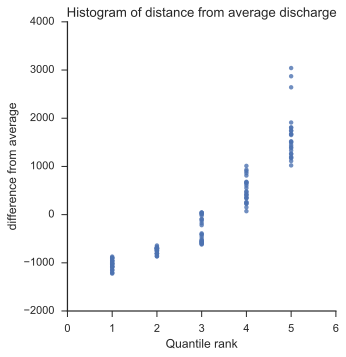

In [129]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Group', 'diff_from_ave', 
           data=QDrop, 
           fit_reg=False)
plt.title('Histogram of distance from average discharge')
plt.xlabel('Quantile rank')
plt.ylabel('difference from average')

(-1200, 4000)

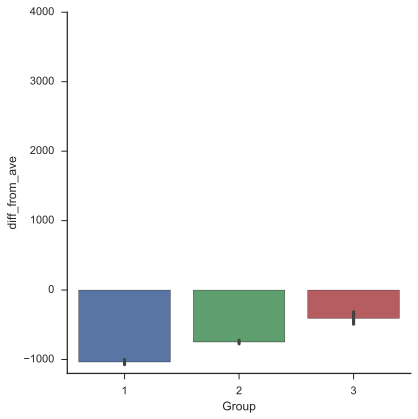

In [142]:
sns.factorplot(x="Group", y="diff_from_ave", data=QDrop.ix[QDrop['diff_from_ave'].astype(float)<=7],
                   size=6, kind="bar")
plt.ylim(-1200,4000)

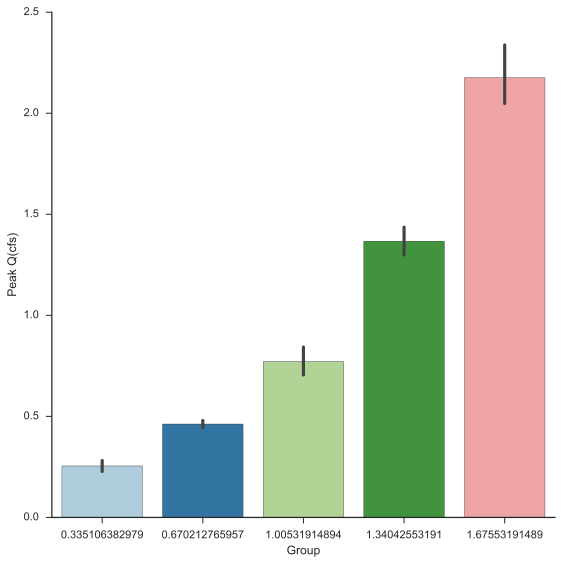

In [113]:
sns.factorplot(x="Group", y="Peak Q(cfs)", data=rpci.ix[rpci['Peak Q(cfs)'].astype(float)<=7],
                   size=8, kind="bar", palette="Paired")

The variance between bars increases from left to right. the pink bar experiences the highest variance while to two blue bars experiance the lowest variance